In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
print(tf.__version__)

1.11.0


In [3]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 1s 0us/step


In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [6]:
train_labels[1]

0

Movie reviews may be different lengths. The below code shows the number of words in the first and second reviews. Since inputs to a neural network must be the same length, we'll need to resolve this later.

In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [9]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


# display movie review text

In [12]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths:

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)

In [16]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [17]:
print(train_data[2])

[   1   14   47    8   30   31    7    4  249  108    7    4 5974   54
   61  369   13   71  149   14   22  112    4 2401  311   12   16 3711
   33   75   43 1829  296    4   86  320   35  534   19  263 4821 1301
    4 1873   33   89   78   12   66   16    4  360    7    4   58  316
  334   11    4 1716   43  645  662    8  257   85 1200   42 1228 2578
   83   68 3912   15   36  165 1539  278   36   69    2  780    8  106
   14 6905 1338   18    6   22   12  215   28  610   40    6   87  326
   23 2300   21   23   22   12  272   40   57   31   11    4   22   47
    6 2307   51    9  170   23  595  116  595 1352   13  191   79  638
   89    2   14    9    8  106  607  624   35  534    6  227    7  129
  113    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [18]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

# Build the Model

In [0]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Loss function and optimizer

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Train the Model

In [25]:
model.fit(x_val,
          y_val,
          epochs=50,
          batch_size=512,
          validation_data=(partial_x_train, partial_y_train),
          verbose=1)

Train on 10000 samples, validate on 15000 samples
Epoch 1/50
10000/10000 [==============================] - 1s 87us/step - loss: 0.6925 - acc: 0.5040 - val_loss: 0.6915 - val_acc: 0.4966
Epoch 2/50
10000/10000 [==============================] - 1s 58us/step - loss: 0.6898 - acc: 0.5262 - val_loss: 0.6882 - val_acc: 0.5291
Epoch 3/50
10000/10000 [==============================] - 1s 56us/step - loss: 0.6850 - acc: 0.6079 - val_loss: 0.6822 - val_acc: 0.6765
Epoch 4/50
10000/10000 [==============================] - 1s 65us/step - loss: 0.6772 - acc: 0.6933 - val_loss: 0.6733 - val_acc: 0.6977
Epoch 5/50
10000/10000 [==============================] - 1s 66us/step - loss: 0.6654 - acc: 0.7548 - val_loss: 0.6599 - val_acc: 0.7190
Epoch 6/50
10000/10000 [==============================] - 1s 65us/step - loss: 0.6483 - acc: 0.7589 - val_loss: 0.6416 - val_acc: 0.7691
Epoch 7/50
10000/10000 [==============================] - 1s 63us/step - loss: 0.6265 - acc: 0.7761 - val_loss: 0.6192 - val_acc

In [34]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val, y_val),
          verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 1s 58us/step - loss: 0.0436 - acc: 0.9927 - val_loss: 0.1815 - val_acc: 0.9360
Epoch 2/3
15000/15000 [==============================] - 1s 58us/step - loss: 0.0420 - acc: 0.9927 - val_loss: 0.1854 - val_acc: 0.9338
Epoch 3/3
15000/15000 [==============================] - 1s 60us/step - loss: 0.0407 - acc: 0.9934 - val_loss: 0.1890 - val_acc: 0.9366


# Evaluate Model

In [27]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 34us/step


[0.4402624337053299, 0.86288]

# Create a graph of accuracy and loss over time

model.fit() returns a History object that contains a dictionary with everything that happened during training

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

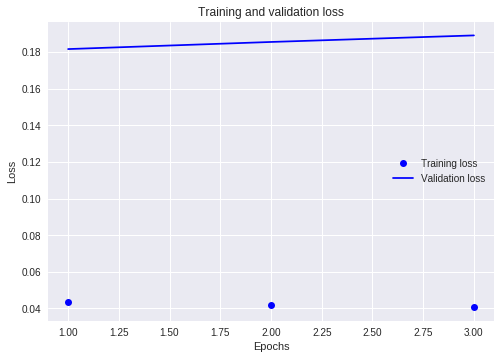

In [37]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

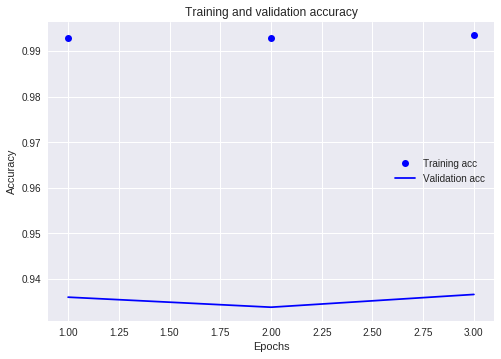

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()